In [2]:
#import the necessary packages 
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm
import scipy
import re
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif,SelectKBest
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor 
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from dateutil.relativedelta import *
pd.set_option('display.max_columns', None)

In [3]:
#import the dataset as a panda dataframe 
df = pd.read_excel("RBA_KYC_Accounts_ALL_Ids.xlsx")

<div style="color:blue;  font-size: 30px; text-align:center;  font-weight: bold;">  Sampling and performance definition </div> 

In [155]:
#assigning df to another var / avoid reloading the dataset if an eroor arises 
df1 = df.copy()

In [54]:
df1.describe(include  = 'all')

,org_code,branchCode,customerId,fullaccount,customerType,creationDate,onboarding,residentStatus,residentCountry,nationalityOriginal,extraNationality,dateOfBirth,age_in_year,birthCountry,birthPlace,profession,companyType,giinCode,lastUpdate,status,ledgerCode,accountCurrency,jointAccount,IsBlackListed,CUS_CLASS,ECO_SEC,TYPE_OF_DEP,GENDER,LEGAL_STA_CODE,legal_Stat_desc,avg_last_10_days,avg_last_30_days,avg_last_90_days,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days,date_of_assessment,rbaGradeAbrv,rba_grade_desc,score_card,score_card_Desc,rbaValue
count,224868.0,224868.000000,2.248680e+05,224868,224868.000000,224868,224868,224868.000000,224272,221429,1793,220153,220153.000000,0.0,203026,79748.000000,114574.000000,12,0.0,224868,224868.000000,224868,224868.000000,224868.0,224868.000000,224868.000000,224868.000000,104357.000000,222252.000000,0.0,2.248680e+05,2.248680e+05,224868.000000,224868.000000,2.248680e+05,224868.000000,2.248680e+05,224868.000000,2.248680e+05,224868.000000,2.248680e+05,224868,224868,224868,224868,0.0,224868.000000
unique,NaN,NaN,NaN,220434,NaN,7041,2,NaN,62,67,35,21457,NaN,NaN,1000,NaN,NaN,1,NaN,1,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,3,4,NaN,NaN
top,NaN,NaN,NaN,020902507770010010000,NaN,2013-11-20,N,NaN,JO,JO,US,1992-07-22,NaN,NaN,????,NaN,NaN,ZLVK2E.99999.SL.400,NaN,Active,NaN,JOD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-24,L,Low,I-Existing,NaN,NaN
freq,NaN,NaN,NaN,26,NaN,1079,219791,NaN,219253,213141,1028,1035,NaN,NaN,76312,NaN,NaN,12,NaN,224868,NaN,214657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,224868,159680,159680,178495,NaN,NaN
mean,1.0,448.451323,4.394503e+16,NaN,1.114418,NaN,NaN,1.021221,NaN,NaN,NaN,NaN,41.310575,NaN,NaN,18.309487,49.857577,NaN,NaN,NaN,1059.328757,NaN,0.021653,0.0,3.765231,89.388632,35.509014,1.250975,1.193564,NaN,7.832261e+03,1.988950e+03,18.871381,0.491422,-1.113435e+03,1.131437,-3.540383e+03,0.254305,4.763851e+02,0.868518,2.450953e+03,NaN,NaN,NaN,NaN,NaN,17.624194
std,0.0,228.193308,2.349321e+16,NaN,0.318319,NaN,NaN,0.144122,NaN,NaN,NaN,NaN,16.000536,NaN,NaN,6.586481,6.736115,NaN,NaN,NaN,1280.875258,NaN,0.145547,0.0,4.305015,29.406849,15.491855,0.433576,0.528191,NaN,1.325116e+06,3.344322e+05,3685.041168,5.335240,3.028084e+04,19.713739,9.151602e+04,1.175586,2.028110e+04,12.373992,5.819818e+04,NaN,NaN,NaN,NaN,NaN,8.368345
min,1.0,201.000000,2.020028e+09,NaN,1.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,10.000000,NaN,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,NaN,-1.791005e+08,-4.513426e+07,-485686.730000,0.000000,-5.482044e+06,0.000000,-1.654371e+07,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,4.080000
25%,1.0,208.000000,2.070207e+16,NaN,1.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,31.000000,NaN,NaN,20.000000,51.000000,NaN,NaN,NaN,20.000000,NaN,0.000000,0.0,2.000000,90.000000,20.000000,1.000000,1.000000,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,13.330000
50%,1.0,401.000000,4.011205e+16,NaN,1.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,41.000000,NaN,NaN,20.000000,51.000000,NaN,NaN,NaN,1302.000000,NaN,0.000000,0.0,2.000000,90.000000,35.000000,1.000000,1.000000,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,16.530000
75%,1.0,701.000000,7.012410e+16,NaN,1.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,52.000000,NaN,NaN,21.000000,51.000000,NaN,NaN,NaN,1396.000000,NaN,0.000000,0.0,2.000000,90.000000,51.000000,2.000000,1.000000,NaN,6.914525e+02,1.826150e+02,1.100000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,N

In [55]:
df1.head()

,org_code,branchCode,customerId,fullaccount,customerType,creationDate,onboarding,residentStatus,residentCountry,nationalityOriginal,extraNationality,dateOfBirth,age_in_year,birthCountry,birthPlace,profession,companyType,giinCode,lastUpdate,status,ledgerCode,accountCurrency,jointAccount,IsBlackListed,CUS_CLASS,ECO_SEC,TYPE_OF_DEP,GENDER,LEGAL_STA_CODE,legal_Stat_desc,avg_last_10_days,avg_last_30_days,avg_last_90_days,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days,date_of_assessment,rbaGradeAbrv,rba_grade_desc,score_card,score_card_Desc,rbaValue
0,1,201,20100400550000072,020100400550015817000,2,2015-04-05,N,1,JO,JO,NaN,NaN,NaN,NaN,NaN,NaN,35.0,NaN,NaN,Active,5817,JOD,0,0,4,46,35,NaN,2.0,NaN,8610000.00,2170000.00,23333.33,0,0.0,0,0.0,0,0.0,0,0.0,2019-01-24,L,Low,E-Existing,NaN,13.20
1,1,202,20200207860000638,020200207860011330000,1,2013-09-17,N,1,JO,JO,NaN,1989-06-30,30.0,NaN,????,27.0,NaN,NaN,NaN,Active,1330,JOD,0,0,2,90,23,2.0,1.0,NaN,0.00,0.00,0.00,0,0.0,0,0.0,0,0.0,0,0.0,2019-01-24,L,Low,I-Existing,NaN,16.93
2,1,202,20200207860000638,020200207860011389002,1,2013-09-17,N,1,JO,JO,NaN,1989-06-30,30.0,NaN,????,27.0,NaN,NaN,NaN,Active,1389,JOD,0,0,2,90,23,2.0,1.0,NaN,-137562.72,-34672.52,-369.81,0,0.0,0,0.0,0,0.0,0,0.0,2019-01-24,L,Low,I-Existing,NaN,16.93
3,1,202,20200207860000638,020200207860010060000,1,2013-09-17,N,1,JO,JO,NaN,1989-06-30,30.0,NaN,????,27.0,NaN,NaN,NaN,Active,60,JOD,0,0,2,90,23,2.0,1.0,NaN,2079.79,526.87,6.68,4,-550.0,4,-550.0,1,50.0,1,50.0,2019-01-24,L,Low,I-Existing,NaN,16.93
4,1,202,20200207860000638,020200207860010010000,1,2013-09-17,N,1,JO,JO,NaN,1989-06-30,30.0,NaN,????,27.0,NaN,NaN,NaN,Active,10,JOD,0,0,2,90,23,2.0,1.0,NaN,444.00,120.50,0.95,4,-540.0,4,-540.0,1,56.0,1,56.0,2019-01-24,L,Low,I-Existing,NaN,16.93


In [56]:
size = df1.shape
print("Size of the Dataframe -> {}".format(size))

Size of the Dataframe -> (224868, 47)


In [57]:
#Check the averages of deposit and withdrawalls
[print(col + ": "+str(round(np.average(df1[col])))) for col in df1.iloc[:,30:40].columns]

avg_last_10_days: 7832.0
avg_last_30_days: 1989.0
avg_last_90_days: 19.0
number_of_cash_dep_90_days: 0.0
avg_cash_deposit_90_days: -1113.0
number_of_deposit_90_days: 1.0
avg_of_dep_90_days: -3540.0
number_of_cash_wd_90_days: 0.0
avg_of_cash_wd_90_days: 476.0
number_of_wd_90_days: 1.0


[None, None, None, None, None, None, None, None, None, None]

## Correlations amongst variables

Text(0.5, 1.0, 'Correlation Heatmap on RBA')

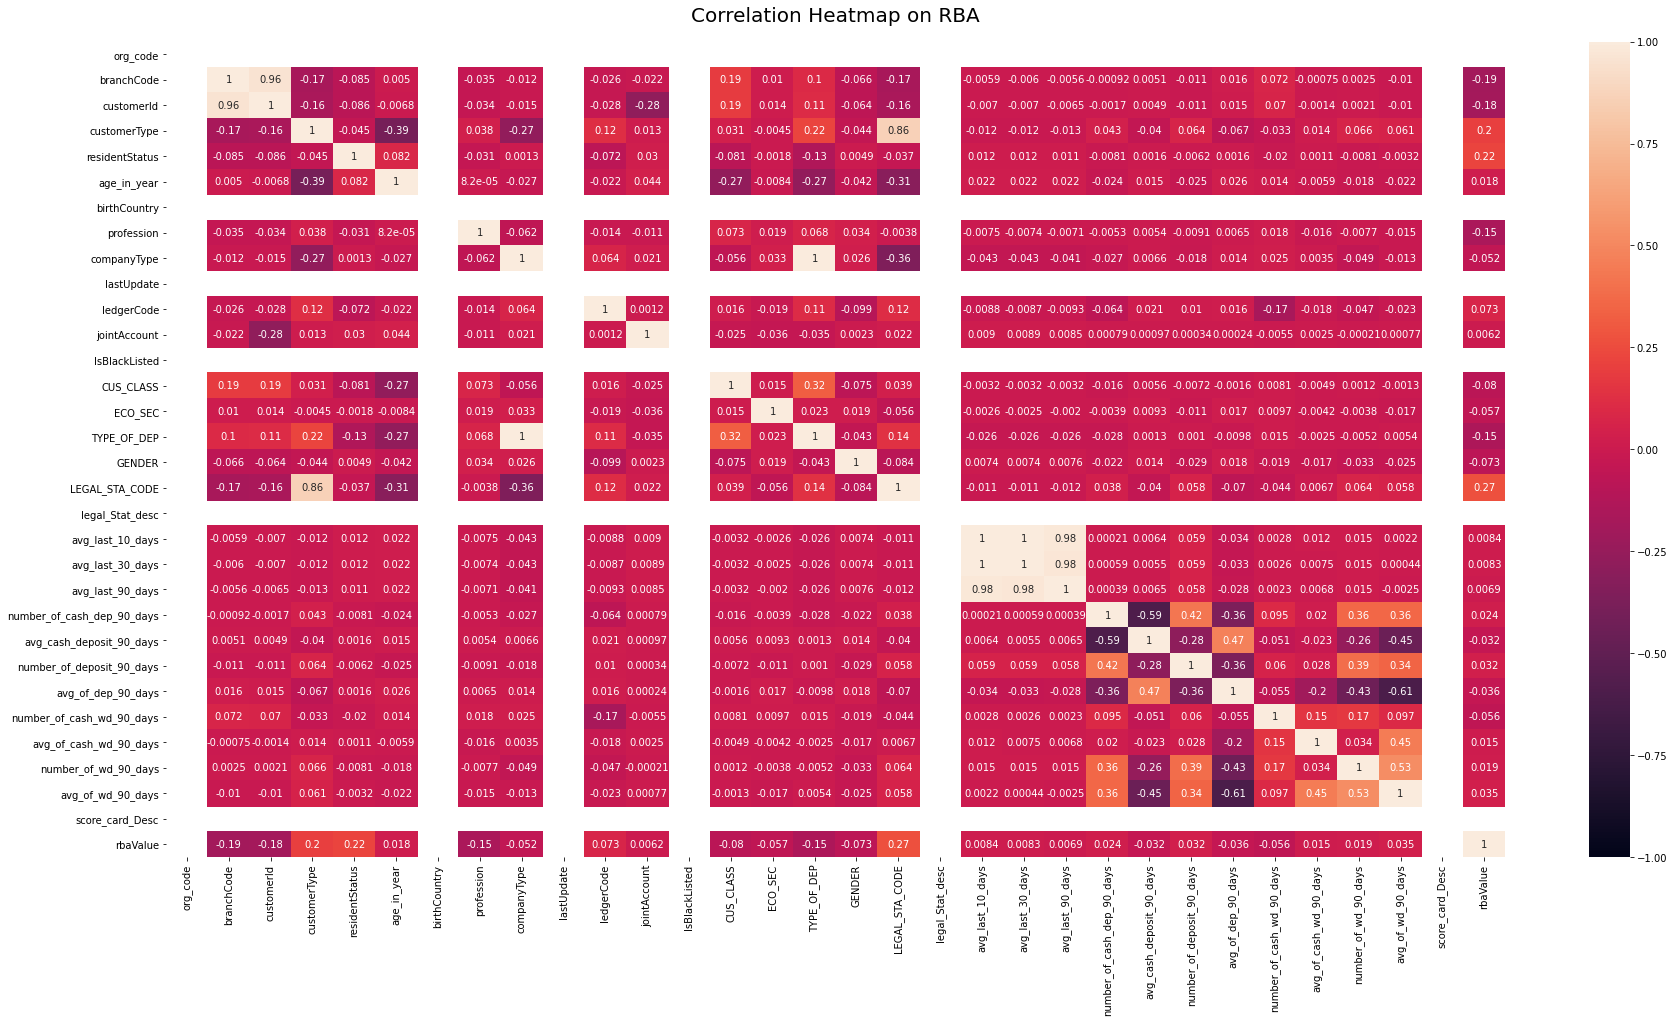

In [58]:
plt.figure(figsize=(30,15))
heatmap=sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap on RBA', fontdict={'fontsize':20},pad=20)

## Visualise the variables 

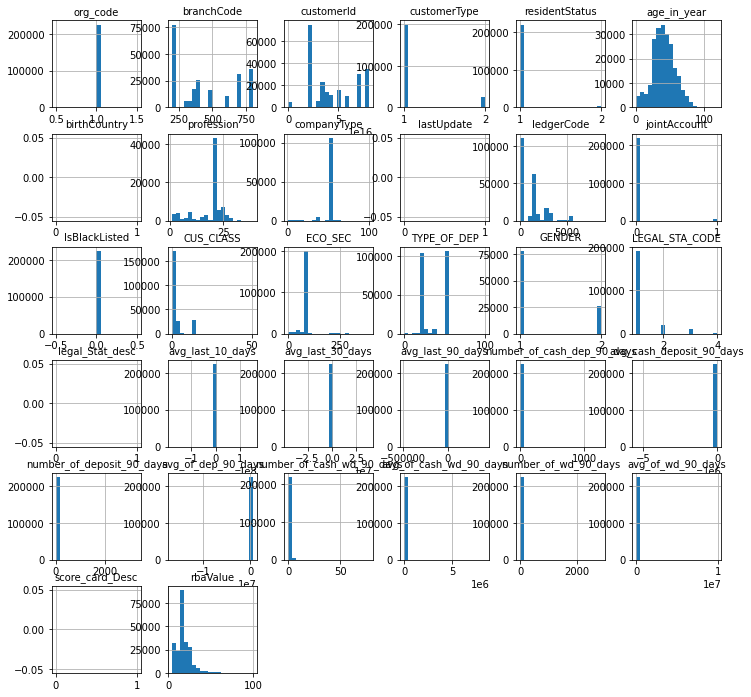

In [59]:
%matplotlib inline
import matplotlib.pylab as plt
attribute_columns = list(df.columns)
if True:
    fontsize = 10
    fig = df[attribute_columns].hist(bins = 20, figsize = (12, 12),
                                       xlabelsize=fontsize,
                                       ylabelsize=fontsize)
    for x in fig.ravel():
        x.title.set_size(fontsize)
else:
    nrows = (len(attribute_columns)+1) // 2
    plt.figure(figsize=(12,25))
    for i in range(len(attribute_columns)):
        name = attribute_columns[i]
        plt.subplot(nrows,2,i+1)
        data[name].hist()
        plt.title(name, fontsize=14)
    
plt.show()

## Target variable visualisation 

224868
0
count    224868.000000
mean         17.624194
std           8.368345
min           4.080000
25%          13.330000
50%          16.530000
75%          21.330000
max         100.000000
Name: rbaValue, dtype: float64


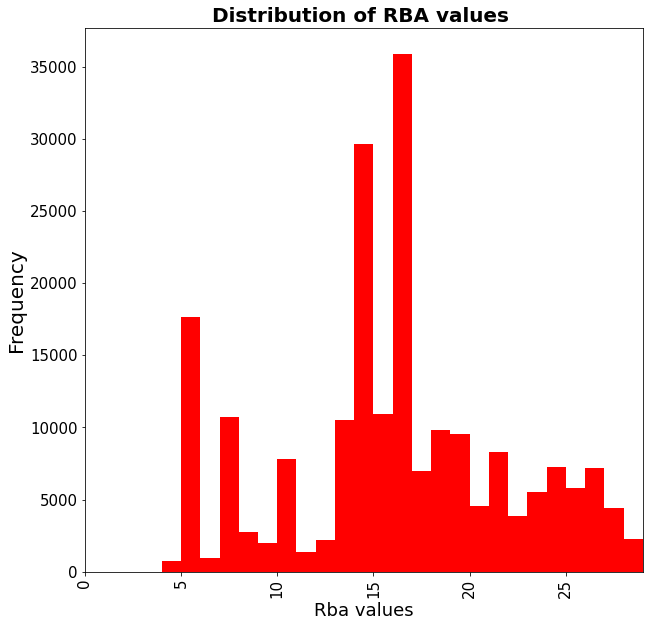

skeweness test 
1.3794762038473176


In [156]:
from matplotlib import pyplot 
#size of rba
print(len(df1['rbaValue']))
#number of nulls
print(df1['rbaValue'].isnull().sum())
#other stat
print(df1['rbaValue'].describe())


bins = range(30)
rbahist = df['rbaValue'].hist(bins = bins, figsize = (10, 10),
                                   grid = False,facecolor='r',range=(min(df['rbaValue']), max(df['rbaValue'])))
#set x axis legend to the median of the bin
plt.xlim(bins[0], bins[-1])
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
rbahist.set_xlabel('Rba values',fontsize=18)
rbahist.set_ylabel(('Frequency') ,fontsize=20)
rbahist.set_title('Distribution of RBA values ',fontsize=20,weight='bold')
plt.show()

print("skeweness test ")
data = pd.to_numeric(df['rbaValue'], downcast='integer')
print(scipy.stats.skew(data))


## Note 
- interrogation mark in dataset 
- word and integer in risk descrition, resident country and nationality original 
- multiple outliers 

<div style="color:blue;  font-size: 30px; text-align:center;  font-weight: bold;">  Feature engineering  </div> 

In [157]:
df1['Risk_Description'] = df1['rba_grade_desc']
df1.drop(['rba_grade_desc'], axis = 1, inplace = True) 

## Creating the variable creationDate_indays

In [158]:
df1['creationDate_indays'] = df1['creationDate'].astype('datetime64[ns]').max()-df1['creationDate'].astype('datetime64[ns]') 
df1['creationDate_indays'].head()

0   1295 days
1   1860 days
2   1860 days
3   1860 days
4   1860 days
Name: creationDate_indays, dtype: timedelta64[ns]

## Creating the variable date of birth

In [159]:
def f(end):
    global max_date
    try:
        r = relativedelta(max_date, end) 
        return(r.years)
    except:
        return(0)
#    r = relativedelta(pd.to_datetime('now'), end) 
#    return '{} years {} days'.format(r.years, r.days)

In [160]:
max_date = df1['date_of_assessment'].astype('datetime64[ns]').max()
df1['age'] = df1['dateOfBirth'].astype('datetime64[ns]').apply(f)
print(df1['age'].head())
print(np.mean(df1['age']))

0     0
1    29
2    29
3    29
4    29
Name: age, dtype: int64
39.58542344842307


## Import metadata categories

In [161]:
#import the curency dataset as a panda dataframe joigning witht he original currency codes
currencies = pd.read_excel("currenciesmetadata.xlsx")
currencies = currencies.rename(columns={"value": "accountCurrency"})
df1["accountCurrency"] = df1["accountCurrency"].astype(str)
currencies["accountCurrency"] = currencies["accountCurrency"].astype(str)
df1 = df1.merge(currencies, on='accountCurrency', how='left' )

In [162]:
#import the country dataset as a panda dataframe joigning witht he original currency codes
countries = pd.read_excel("countrymetadata.xlsx")
countries = countries.rename(columns={"value": "nationalityOriginal", "code": "country_code", "dsc":"full_country"})
df1["nationalityOriginal"] = df1["nationalityOriginal"].astype(str)
countries["nationalityOriginal"] = countries["nationalityOriginal"].astype(str)
df1 = df1.merge(countries, on='nationalityOriginal', how='left' )

In [163]:
df1.head()

,org_code,branchCode,customerId,fullaccount,customerType,creationDate,onboarding,residentStatus,residentCountry,nationalityOriginal,extraNationality,dateOfBirth,age_in_year,birthCountry,birthPlace,profession,companyType,giinCode,lastUpdate,status,ledgerCode,accountCurrency,jointAccount,IsBlackListed,CUS_CLASS,ECO_SEC,TYPE_OF_DEP,GENDER,LEGAL_STA_CODE,legal_Stat_desc,avg_last_10_days,avg_last_30_days,avg_last_90_days,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days,date_of_assessment,rbaGradeAbrv,score_card,score_card_Desc,rbaValue,Risk_Description,creationDate_indays,age,code,dsc,country_code,full_country
0,1,201,20100400550000072,020100400550015817000,2,2015-04-05,N,1,JO,JO,NaN,NaN,NaN,NaN,NaN,NaN,35.0,NaN,NaN,Active,5817,JOD,0,0,4,46,35,NaN,2.0,NaN,8610000.00,2170000.00,23333.33,0,0.0,0,0.0,0,0.0,0,0.0,2019-01-24,L,E-Existing,NaN,13.20,Low,1295 days,0,RBA_Currency_Low,Jordanian Dinar,RBA_Countries_Low,JORDAN
1,1,202,20200207860000638,020200207860011330000,1,2013-09-17,N,1,JO,JO,NaN,1989-06-30,30.0,NaN,????,27.0,NaN,NaN,NaN,Active,1330,JOD,0,0,2,90,23,2.0,1.0,NaN,0.00,0.00,0.00,0,0.0,0,0.0,0,0.0,0,0.0,2019-01-24,L,I-Existing,NaN,16.93,Low,1860 days,29,RBA_Currency_Low,Jordanian Dinar,RBA_Countries_Low,JORDAN
2,1,202,20200207860000638,020200207860011389002,1,2013-09-17,N,1,JO,JO,NaN,1989-06-30,30.0,NaN,????,27.0,NaN,NaN,NaN,Active,1389,JOD,0,0,2,90,23,2.0,1.0,NaN,-137562.72,-34672.52,-369.81,0,0.0,0,0.0,0,0.0,0,0.0,2019-01-24,L,I-Existing,NaN,16.93,Low,1860 days,29,RBA_Currency_Low,Jordanian Dinar,RBA_Countries_Low,JORDAN
3,1,202,20200207860000638,020200207860010060000,1,2013-09-17,N,1,JO,JO,NaN,1989-06-30,30.0,NaN,????,27.0,NaN,NaN,NaN,Active,60,JOD,0,0,2,90,23,2.0,1.0,NaN,2079.79,526.87,6.68,4,-550.0,4,-550.0,1,50.0,1,50.0,2019-01-24,L,I-Existing,NaN,16.93,Low,1860 days,29,RBA_Currency_Low,Jordanian Dinar,RBA_Countries_Low,JORDAN
4,1,202,20200207860000638,020200207860010010000,1,2013-09-17,N,1,JO,JO,NaN,1989-06-30,30.0,NaN,????,27.0,NaN,NaN,NaN,Active,10,JOD,0,0,2,90,23,2.0,1.0,NaN,444.00,120.50,0.95,4,-540.0,4,-540.0,1,56.0,1,56.0,2019-01-24,L,I-Existing,NaN,16.93,Low,1860 days,29,RBA_Currency_Low,Jordanian Dinar,RBA_Countries_Low,JORDAN


## Adapt currency with exchange rate 

In [164]:
#Import a currency dataset to have the English pound as a base value for analysis 
#month of January 2021 used as baseline
exchange = pd.read_csv("poundexch.csv")
print(exchange.head())
exchange = exchange.drop(['Country/Territories','Currency','Start Date','End Date'], axis = 1)
exchange = exchange.rename(columns={"Currency Code": "accountCurrency"})
df1 = df1.merge(exchange, on='accountCurrency', how='left' )

  Country/Territories Currency Currency Code  Currency units per one pound   \
0           Argentina     Peso           ARS                       117.6700   
1           Australia   Dollar           AUD                         1.7604   
2              Brazil     Real           BRL                         7.2223   
3              Canada   Dollar           CAD                         1.7215   
4             Denmark    Krone           DKK                         8.3763   

   Start Date    End Date  
0  01/02/2021  28/02/2021  
1  01/02/2021  28/02/2021  
2  01/02/2021  28/02/2021  
3  01/02/2021  28/02/2021  
4  01/02/2021  28/02/2021  


In [165]:
print(len(df1["Currency units per one pound "]))
len(df1["avg_last_10_days"])

225054


225054

In [166]:
currencycol = ['avg_last_10_days','avg_last_30_days', 'avg_last_90_days','avg_cash_deposit_90_days','avg_of_dep_90_days','avg_of_cash_wd_90_days','avg_of_wd_90_days']
currencycol

['avg_last_10_days',
 'avg_last_30_days',
 'avg_last_90_days',
 'avg_cash_deposit_90_days',
 'avg_of_dep_90_days',
 'avg_of_cash_wd_90_days',
 'avg_of_wd_90_days']

In [167]:
print(df1.loc[0:10,'avg_last_10_days'])
for ccol in currencycol:
    df1[ccol] = round(df1[[ccol]].multiply(df1["Currency units per one pound "], axis="index"),2)
print(df1.loc[0:10,'avg_last_10_days'])

0     8610000.00
1           0.00
2     -137562.72
3        2079.79
4         444.00
5           0.00
6           0.00
7          24.60
8           0.00
9           0.00
10       2569.65
Name: avg_last_10_days, dtype: float64
0     8321565.00
1           0.00
2     -132954.37
3        2010.12
4         429.13
5           0.00
6           0.00
7          23.78
8           0.00
9           0.00
10       2483.57
Name: avg_last_10_days, dtype: float64


 <div style="color:blue;  font-size: 30px; text-align:center;  font-weight: bold;">  Preprocessing </div> 

## Missing values

In [168]:
# Percentage of missing values identifyied with "null"
print(100*df1.isnull().sum()/df1.isnull().count())

org_code                           0.000000
branchCode                         0.000000
customerId                         0.000000
fullaccount                        0.000000
customerType                       0.000000
creationDate                       0.000000
onboarding                         0.000000
residentStatus                     0.000000
residentCountry                    0.267491
nationalityOriginal                0.000000
extraNationality                  99.203302
dateOfBirth                        2.105717
age_in_year                        2.105717
birthCountry                     100.000000
birthPlace                         9.738107
profession                        64.543621
companyType                       49.048673
giinCode                          99.994668
lastUpdate                       100.000000
status                             0.000000
ledgerCode                         0.000000
accountCurrency                    0.000000
jointAccount                    

In [169]:
#Other metrics for null values: interrogation mark 
for name in df1.columns:
    li = []
    for el in df1[name].astype(str):
        li.append(len(re.findall("\?.*",el)))
    print(name)
    print(100 * sum(li) / len(df1[name]))

org_code
0.0
branchCode
0.0
customerId
0.0
fullaccount
0.0
customerType
0.0
creationDate
0.0
onboarding
0.0
residentStatus
0.0
residentCountry
0.0
nationalityOriginal
0.0
extraNationality
0.0
dateOfBirth
0.0
age_in_year
0.0
birthCountry
0.0
birthPlace
89.28079483146267
profession
0.0
companyType
0.0
giinCode
0.0
lastUpdate
0.0
status
0.0
ledgerCode
0.0
accountCurrency
0.0
jointAccount
0.0
IsBlackListed
0.0
CUS_CLASS
0.0
ECO_SEC
0.0
TYPE_OF_DEP
0.0
GENDER
0.0
LEGAL_STA_CODE
0.0
legal_Stat_desc
0.0
avg_last_10_days
0.0
avg_last_30_days
0.0
avg_last_90_days
0.0
number_of_cash_dep_90_days
0.0
avg_cash_deposit_90_days
0.0
number_of_deposit_90_days
0.0
avg_of_dep_90_days
0.0
number_of_cash_wd_90_days
0.0
avg_of_cash_wd_90_days
0.0
number_of_wd_90_days
0.0
avg_of_wd_90_days
0.0
date_of_assessment
0.0
rbaGradeAbrv
0.0
score_card
0.0
score_card_Desc
0.0
rbaValue
0.0
Risk_Description
0.0
creationDate_indays
0.0
age
0.0
code
0.0
dsc
0.0
country_code
0.0
full_country
0.0
Currency units per one pou

- birthplace  has 89.3% ? mark + 9.7% of missing values = 99% missing data

In [170]:
#check for string na
    #assign null if n/a as string 
def inter(df):
    summed = []
    for col in df.columns:
        indiv = []
        for el in df[col].astype(str):
            if el == 'nan' or el == 'NaN':
                indiv.append(el)
        summed.append(col)
        summed.append(100 * len(indiv) / len(df[col]))
        df[col].loc[el] = None
    return [summed,df]

result = inter(df1)
print(result[0])
df1 = result[1]

['org_code', 0.0, 'branchCode', 0.0, 'customerId', 0.0, 'fullaccount', 0.0, 'customerType', 0.0, 'creationDate', 0.0, 'onboarding', 0.0, 'residentStatus', 0.0, 'residentCountry', 0.2674913576297244, 'nationalityOriginal', 1.5316324082220267, 'extraNationality', 99.20330231855466, 'dateOfBirth', 2.1057168501781796, 'age_in_year', 2.1057168501781796, 'birthCountry', 100.0, 'birthPlace', 9.738107298692759, 'profession', 64.543620642157, 'companyType', 49.048672762981326, 'giinCode', 99.99466794635954, 'lastUpdate', 100.0, 'status', 0.0, 'ledgerCode', 0.0, 'accountCurrency', 0.0, 'jointAccount', 0.0, 'IsBlackListed', 0.0, 'CUS_CLASS', 0.0, 'ECO_SEC', 0.0, 'TYPE_OF_DEP', 0.0, 'GENDER', 53.606245612164194, 'LEGAL_STA_CODE', 1.1623876936201978, 'legal_Stat_desc', 100.0, 'avg_last_10_days', 0.1248589227474295, 'avg_last_30_days', 0.1248589227474295, 'avg_last_90_days', 0.1248589227474295, 'number_of_cash_dep_90_days', 0.0, 'avg_cash_deposit_90_days', 0.1248589227474295, 'number_of_deposit_90_d

# Missing values
1. Drop the 98% and above missing values column 
2. Drop duplicate column
2. Inspect the column with a single value 
3. Impute or/and drop remaining missing values 

**Drop the 98% and above missing values column**

In [171]:
#Dropping 100% missing value column 
df1 = df1.drop(["score_card_Desc","birthCountry","lastUpdate","legal_Stat_desc","giinCode","birthPlace","extraNationality"], axis = 1)
df1.head()

,org_code,branchCode,customerId,fullaccount,customerType,creationDate,onboarding,residentStatus,residentCountry,nationalityOriginal,dateOfBirth,age_in_year,profession,companyType,status,ledgerCode,accountCurrency,jointAccount,IsBlackListed,CUS_CLASS,ECO_SEC,TYPE_OF_DEP,GENDER,LEGAL_STA_CODE,avg_last_10_days,avg_last_30_days,avg_last_90_days,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days,date_of_assessment,rbaGradeAbrv,score_card,rbaValue,Risk_Description,creationDate_indays,age,code,dsc,country_code,full_country,Currency units per one pound
0,1,201,20100400550000072,020100400550015817000,2,2015-04-05,N,1,JO,JO,NaN,NaN,NaN,35.0,Active,5817,JOD,0,0,4,46,35,NaN,2.0,8321565.00,2097305.00,22551.66,0,0.00,0,0.00,0,0.00,0,0.00,2019-01-24,L,E-Existing,13.20,Low,1295 days,0,RBA_Currency_Low,Jordanian Dinar,RBA_Countries_Low,JORDAN,0.9665
1,1,202,20200207860000638,020200207860011330000,1,2013-09-17,N,1,JO,JO,1989-06-30,30.0,27.0,NaN,Active,1330,JOD,0,0,2,90,23,2.0,1.0,0.00,0.00,0.00,0,0.00,0,0.00,0,0.00,0,0.00,2019-01-24,L,I-Existing,16.93,Low,1860 days,29,RBA_Currency_Low,Jordanian Dinar,RBA_Countries_Low,JORDAN,0.9665
2,1,202,20200207860000638,020200207860011389002,1,2013-09-17,N,1,JO,JO,1989-06-30,30.0,27.0,NaN,Active,1389,JOD,0,0,2,90,23,2.0,1.0,-132954.37,-33510.99,-357.42,0,0.00,0,0.00,0,0.00,0,0.00,2019-01-24,L,I-Existing,16.93,Low,1860 days,29,RBA_Currency_Low,Jordanian Dinar,RBA_Countries_Low,JORDAN,0.9665
3,1,202,20200207860000638,020200207860010060000,1,2013-09-17,N,1,JO,JO,1989-06-30,30.0,27.0,NaN,Active,60,JOD,0,0,2,90,23,2.0,1.0,2010.12,509.22,6.46,4,-531.58,4,-531.58,1,48.32,1,48.32,2019-01-24,L,I-Existing,16.93,Low,1860 days,29,RBA_Currency_Low,Jordanian Dinar,RBA_Countries_Low,JORDAN,0.9665
4,1,202,20200207860000638,020200207860010010000,1,2013-09-17,N,1,JO,JO,1989-06-30,30.0,27.0,NaN,Active,10,JOD,0,0,2,90,23,2.0,1.0,429.13,116.46,0.92,4,-521.91,4,-521.91,1,54.12,1,54.12,2019-01-24,L,I-Existing,16.93,Low,1860 days,29,RBA_Currency_Low,Jordanian Dinar,RBA_Countries_Low,JORDAN,0.9665


**Drop duplicate column**

In [172]:
#Dropping duplicate columns
df1 = df1.drop(["age_in_year"], axis = 1)

**Inspect the column with a single value**

In [173]:
#check for other column with a single value 
print({col: df1[col].nunique() for col in df1.columns})
print("")
#Org_code, status,isBlackListed,date_of_assessment have only 1 values; flag variable ??
print({col: pd.Series(df1[col]).drop_duplicates().tolist() for col in df1.columns if df1[col].nunique() == 1})
#see below the unique value text to check for a flag or not: if it has null values it could be that the user input a 
#value for a scenario such as blacklisted or let as null if not 
{col: pd.Series(df1[col]).isna().sum() for col in df1.columns if df1[col].nunique() == 1}
#no missing values for the selected collumn, the above theory does not apply to any of the collumn, they are to be dropped

df1 = df1.drop(["org_code","status","IsBlackListed","date_of_assessment"], axis = 1)

{'org_code': 1, 'branchCode': 30, 'customerId': 75339, 'fullaccount': 220434, 'customerType': 2, 'creationDate': 7041, 'onboarding': 2, 'residentStatus': 2, 'residentCountry': 62, 'nationalityOriginal': 68, 'dateOfBirth': 21457, 'profession': 32, 'companyType': 33, 'status': 1, 'ledgerCode': 227, 'accountCurrency': 20, 'jointAccount': 2, 'IsBlackListed': 1, 'CUS_CLASS': 10, 'ECO_SEC': 206, 'TYPE_OF_DEP': 51, 'GENDER': 2, 'LEGAL_STA_CODE': 4, 'avg_last_10_days': 106267, 'avg_last_30_days': 93987, 'avg_last_90_days': 37378, 'number_of_cash_dep_90_days': 151, 'avg_cash_deposit_90_days': 5990, 'number_of_deposit_90_days': 293, 'avg_of_dep_90_days': 11468, 'number_of_cash_wd_90_days': 45, 'avg_of_cash_wd_90_days': 5578, 'number_of_wd_90_days': 259, 'avg_of_wd_90_days': 8915, 'date_of_assessment': 1, 'rbaGradeAbrv': 3, 'score_card': 4, 'rbaValue': 692, 'Risk_Description': 3, 'creationDate_indays': 7041, 'age': 108, 'code': 3, 'dsc': 20, 'country_code': 4, 'full_country': 66, 'Currency units 

**Impute or/and drop remaining missing values**

In [174]:
######Check for companies######
companies = df1[(df1.companyType == 51)]
#other values ie 51,35 see below 
print(companies.describe())
print(100*companies.isnull().sum()/companies.isnull().count())
print("how many companies are there ?" + str(len(companies)))
#we can see only a very few company type are missing compared to the overall dtb ratio (49%) so we are really talking about companies !
#the following fields are set as null for companies; Gender, profession lets remedy to it !

         branchCode    customerId  customerType  residentStatus    profession  \
count  89324.000000  8.932400e+04  89324.000000    89324.000000  38429.000000   
mean     510.572657  5.037969e+16      1.000582        1.002788     18.718572   
std      228.828829  2.345291e+16      0.024121        0.052724      5.624018   
min      202.000000  2.020032e+09      1.000000        1.000000      1.000000   
25%      302.000000  2.090094e+16      1.000000        1.000000     20.000000   
50%      502.000000  5.020033e+16      1.000000        1.000000     20.000000   
75%      704.000000  7.040077e+16      1.000000        1.000000     21.000000   
max      805.000000  8.052727e+16      2.000000        2.000000     33.000000   

       companyType    ledgerCode  jointAccount     CUS_CLASS       ECO_SEC  \
count      89324.0  89324.000000  89324.000000  89324.000000  89324.000000   
mean          51.0   1115.265696      0.013031      5.549617     89.810420   
std            0.0   1150.925081    

In [175]:
df1['GENDER'] = df1['GENDER'].fillna(0).replace('NaN',0)
#if it is a company the value is filled with an integer over 0
df1['companyType'] = df1['companyType'].fillna(0).replace('NaN',0)
df1['dateOfBirth'] = df1['dateOfBirth'].fillna("00/00/0000").replace('NaN',"00/00/0000")
df1['profession'] = df1['profession'].fillna('company').replace('NaN','company')

In [176]:
#INspecting the remaining null values 
print(100*df1.isnull().sum()/df1.isnull().count())

branchCode                       0.000000
customerId                       0.000000
fullaccount                      0.000000
customerType                     0.000000
creationDate                     0.000000
onboarding                       0.000000
residentStatus                   0.000000
residentCountry                  0.267491
nationalityOriginal              0.000000
dateOfBirth                      0.000000
profession                       0.000000
companyType                      0.000000
ledgerCode                       0.000000
accountCurrency                  0.000000
jointAccount                     0.000000
CUS_CLASS                        0.000000
ECO_SEC                          0.000000
TYPE_OF_DEP                      0.000000
GENDER                           0.000000
LEGAL_STA_CODE                   1.162388
avg_last_10_days                 0.124859
avg_last_30_days                 0.124859
avg_last_90_days                 0.124859
number_of_cash_dep_90_days       0

In [177]:
#droppping the few nas left
df1 = df1.dropna(axis=0,how='any') 

In [178]:
#Confirm absence of null values
print(100*df1.isnull().sum()/df1.isnull().count())

branchCode                       0.0
customerId                       0.0
fullaccount                      0.0
customerType                     0.0
creationDate                     0.0
onboarding                       0.0
residentStatus                   0.0
residentCountry                  0.0
nationalityOriginal              0.0
dateOfBirth                      0.0
profession                       0.0
companyType                      0.0
ledgerCode                       0.0
accountCurrency                  0.0
jointAccount                     0.0
CUS_CLASS                        0.0
ECO_SEC                          0.0
TYPE_OF_DEP                      0.0
GENDER                           0.0
LEGAL_STA_CODE                   0.0
avg_last_10_days                 0.0
avg_last_30_days                 0.0
avg_last_90_days                 0.0
number_of_cash_dep_90_days       0.0
avg_cash_deposit_90_days         0.0
number_of_deposit_90_days        0.0
avg_of_dep_90_days               0.0
n

In [179]:
#Remaining collumn rows 
df1['customerId'].count()

221557

# Cleaning data types

**Getting rid of the letters with numeric collumns**

In [180]:
#CREATING A FUNCTION TO TRANSFORM TEXT (example 3.17B) INTO NUMBER (REAL NUMBERS, example 3,170,000,000).
def clear_backslash(text):
    ''' Function to clear backslash as they cause all sort of troubles '''
    result = text
    if "\\" in text:
        result = '0'
    return (result)

In [181]:
#CREATING A FUNCTION TO TRANSFORM TEXT (example 3.17B) INTO NUMBER (REAL NUMBERS, example 3,170,000,000).
def text_to_num(text):
    ''' DOC STRING: Function to transform numbers with letter into pure numbers, example: 3.17B into 3,170,000,000 '''
    if type(text) != str:
        return(text)
    result = 0.0  
    text = text.replace(",", "")  
    try:
            if text[-1] in d:
                num, magnitude = text[:-1], text[-1]
                result = float(num) * (10 ** d[magnitude])  #this case is when "text" has T, B, M, k or %
            else:
                result = float(text) #this case is when "text" is string but look like a numeric
    except:
        try:
            result = 1.0*text #this is when "text" is already numeric
        except:
            result = text #it will reach this case when it is impossible to transform into numeric
    return(result)

In [182]:
for fieldname in df1.columns:
    try:
        print(fieldname)
        array_tmp = np.vectorize(clear_backslash)(df1[fieldname].astype(str))
        df1[fieldname] = np.vectorize(text_to_num)(array_tmp)
    except: #It is a date
        print("ERROR:",fieldname, "is a date type!")

branchCode
customerId
fullaccount
customerType
creationDate
onboarding
residentStatus
residentCountry
nationalityOriginal
dateOfBirth
profession
companyType
ledgerCode
accountCurrency
jointAccount
CUS_CLASS
ECO_SEC
TYPE_OF_DEP
GENDER
LEGAL_STA_CODE
avg_last_10_days
avg_last_30_days
avg_last_90_days
number_of_cash_dep_90_days
avg_cash_deposit_90_days
number_of_deposit_90_days
avg_of_dep_90_days
number_of_cash_wd_90_days
avg_of_cash_wd_90_days
number_of_wd_90_days
avg_of_wd_90_days
rbaGradeAbrv
score_card
rbaValue
Risk_Description
creationDate_indays
age
code
dsc
country_code
full_country
Currency units per one pound 


**Set numeric values to absolute - getting rid of minus sign**

In [183]:
#Delete the minus sign in cash deposit
def nominus(t):
    t = t.replace("-", "")  
    return t
for fieldname in df1.columns:
    try:
        print(fieldname)
        array_tmp = np.vectorize(clear_backslash)(df1[fieldname].astype(str))
        df1[fieldname] = np.vectorize(nominus)(array_tmp)
    except: #It is a date
        print("ERROR:",fieldname, "is a date type!")

branchCode
customerId
fullaccount
customerType
creationDate
onboarding
residentStatus
residentCountry
nationalityOriginal
dateOfBirth
profession
companyType
ledgerCode
accountCurrency
jointAccount
CUS_CLASS
ECO_SEC
TYPE_OF_DEP
GENDER
LEGAL_STA_CODE
avg_last_10_days
avg_last_30_days
avg_last_90_days
number_of_cash_dep_90_days
avg_cash_deposit_90_days
number_of_deposit_90_days
avg_of_dep_90_days
number_of_cash_wd_90_days
avg_of_cash_wd_90_days
number_of_wd_90_days
avg_of_wd_90_days
rbaGradeAbrv
score_card
rbaValue
Risk_Description
creationDate_indays
age
code
dsc
country_code
full_country
Currency units per one pound 


In [184]:
#set dummy values for onboarding
def categorize(text):
    if text == 'Y':
        text = 1
    else :
        text = 0
    return text 
df1['onboarding'] = np.vectorize(categorize)(df1['onboarding'])

In [185]:
print(100*df1.isnull().sum()/df1.isnull().count())

branchCode                       0.0
customerId                       0.0
fullaccount                      0.0
customerType                     0.0
creationDate                     0.0
onboarding                       0.0
residentStatus                   0.0
residentCountry                  0.0
nationalityOriginal              0.0
dateOfBirth                      0.0
profession                       0.0
companyType                      0.0
ledgerCode                       0.0
accountCurrency                  0.0
jointAccount                     0.0
CUS_CLASS                        0.0
ECO_SEC                          0.0
TYPE_OF_DEP                      0.0
GENDER                           0.0
LEGAL_STA_CODE                   0.0
avg_last_10_days                 0.0
avg_last_30_days                 0.0
avg_last_90_days                 0.0
number_of_cash_dep_90_days       0.0
avg_cash_deposit_90_days         0.0
number_of_deposit_90_days        0.0
avg_of_dep_90_days               0.0
n

# Standardization

In [186]:

def distribution(x):
    try:
        x.dropna()
        #umbalanced dataset: ets take the average of values that are not 0
        data_1 = np.ma.masked_where(x < 1, x)
        stdev = np.std(data_1)
        meanf = np.average(data_1)
        #replace measure of outlier here 
        H = round(meanf + 2 * stdev,0)
        L = round(meanf - 2 * stdev,0)
        if (L < 0):
            L = 0
        out = [H,L]
        return(out)
    except:
        pass 

#compare with each value to the respective column lower and higher bounds for outliers (bounds defined in distribution fun)
def outliers(x):
    dt = pd.DataFrame(x)
    limit = x.apply(distribution)
    y = pd.DataFrame()
    print(limit)
    #check how many outlier the row pocesses
    dt['outbounds'] = 0
    try:
        for el in dt.columns:
            #check if there are less than 2 values (no flag variables)
            if (dt[el].nunique() < 3):
                continue
            #unique to our dataset _ no codes or id or target variable 
            if ((el == 'outbounds')):
                continue
            print(el)
            high = limit[el].iloc[0]
            low = limit[el].iloc[1]
            #imbalanced dataset what quantile to use ?
            Q1 = dt[el].quantile(0.25).copy()
            Q3 = dt[el].quantile(0.75).copy()
            count = 0
            for ele in dt[el]:
                if (ele > high):
                    y = y.append([[el, high,low, ele]])
                    #Impute the 75th perc if an outlier over the Hlimit
                    #dt.loc[count,el] = Q1
                    dt.iloc[count,11] =   1
                    #dt.set_value(count, 'outbounds', 1) 
                elif (ele < low): 
                    y = y.append([[el, high,low, ele]])
                    #Impute the 25th perc if an outlier below the Llimit
                    #dt.loc[count,el] = Q3
                    dt.iloc[count,11] =   1
                count += 1
    except:
            print(el + " not proper for outlier analysis ") 
    y.columns =[ 'column', 'Hlimit', 'Llimit' ,'value']
    return([y, dt])

b= outliers(df1.iloc[:,20:31].apply(pd.to_numeric))
dt_outliers = b[1]

listO = b[0]





   avg_last_10_days  avg_last_30_days  avg_last_90_days  \
0       142472387.0        36256293.0          465108.0   
1               0.0               0.0               0.0   

   number_of_cash_dep_90_days  avg_cash_deposit_90_days  \
0                        36.0                  210801.0   
1                         0.0                       0.0   

   number_of_deposit_90_days  avg_of_dep_90_days  number_of_cash_wd_90_days  \
0                      115.0            582319.0                        8.0   
1                        0.0                 0.0                        0.0   

   avg_of_cash_wd_90_days  number_of_wd_90_days  avg_of_wd_90_days  
0                181259.0                  80.0           395447.0  
1                     0.0                   0.0                0.0  
avg_last_10_days
avg_last_30_days
avg_last_90_days
number_of_cash_dep_90_days
avg_cash_deposit_90_days
number_of_deposit_90_days
avg_of_dep_90_days
number_of_cash_wd_90_days
avg_of_cash_wd_90_days
nu

In [187]:
df1 = pd.concat([df1,dt_outliers['outbounds']], axis=1)

In [188]:
print(100*df1.isnull().sum()/df1.isnull().count())

branchCode                       0.0
customerId                       0.0
fullaccount                      0.0
customerType                     0.0
creationDate                     0.0
onboarding                       0.0
residentStatus                   0.0
residentCountry                  0.0
nationalityOriginal              0.0
dateOfBirth                      0.0
profession                       0.0
companyType                      0.0
ledgerCode                       0.0
accountCurrency                  0.0
jointAccount                     0.0
CUS_CLASS                        0.0
ECO_SEC                          0.0
TYPE_OF_DEP                      0.0
GENDER                           0.0
LEGAL_STA_CODE                   0.0
avg_last_10_days                 0.0
avg_last_30_days                 0.0
avg_last_90_days                 0.0
number_of_cash_dep_90_days       0.0
avg_cash_deposit_90_days         0.0
number_of_deposit_90_days        0.0
avg_of_dep_90_days               0.0
n

In [189]:
df1.head()

,branchCode,customerId,fullaccount,customerType,creationDate,onboarding,residentStatus,residentCountry,nationalityOriginal,dateOfBirth,profession,companyType,ledgerCode,accountCurrency,jointAccount,CUS_CLASS,ECO_SEC,TYPE_OF_DEP,GENDER,LEGAL_STA_CODE,avg_last_10_days,avg_last_30_days,avg_last_90_days,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days,rbaGradeAbrv,score_card,rbaValue,Risk_Description,creationDate_indays,age,code,dsc,country_code,full_country,Currency units per one pound,outbounds
0,201,20100400550000072,020100400550015817000,2,20150405,0,1,JO,JO,00/00/0000,company,35.0,5817,JOD,0,4,46,35,0.0,2.0,8321565.0,2097305.0,22551.66,0,0.0,0,0.0,0,0.0,0,0.0,L,EExisting,13.2,Low,1295 days,0,RBA_Currency_Low,Jordanian Dinar,RBA_Countries_Low,JORDAN,0.9665,0
1,202,20200207860000638,020200207860011330000,1,20130917,0,1,JO,JO,19890630,27.0,0.0,1330,JOD,0,2,90,23,2.0,1.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,L,IExisting,16.93,Low,1860 days,29,RBA_Currency_Low,Jordanian Dinar,RBA_Countries_Low,JORDAN,0.9665,0
2,202,20200207860000638,020200207860011389002,1,20130917,0,1,JO,JO,19890630,27.0,0.0,1389,JOD,0,2,90,23,2.0,1.0,132954.37,33510.99,357.42,0,0.0,0,0.0,0,0.0,0,0.0,L,IExisting,16.93,Low,1860 days,29,RBA_Currency_Low,Jordanian Dinar,RBA_Countries_Low,JORDAN,0.9665,0
3,202,20200207860000638,020200207860010060000,1,20130917,0,1,JO,JO,19890630,27.0,0.0,60,JOD,0,2,90,23,2.0,1.0,2010.12,509.22,6.46,4,531.58,4,531.58,1,48.32,1,48.32,L,IExisting,16.93,Low,1860 days,29,RBA_Currency_Low,Jordanian Dinar,RBA_Countries_Low,JORDAN,0.9665,0
4,202,20200207860000638,020200207860010010000,1,20130917,0,1,JO,JO,19890630,27.0,0.0,10,JOD,0,2,90,23,2.0,1.0,429.13,116.46,0.92,4,521.91,4,521.91,1,54.12,1,54.12,L,IExisting,16.93,Low,1860 days,29,RBA_Currency_Low,Jordanian Dinar,RBA_Countries_Low,JORDAN,0.9665,0


In [190]:
listO

,column,Hlimit,Llimit,value
0,avg_last_10_days,142472387.0,0.0,2.528541e+10
0,avg_last_10_days,142472387.0,0.0,1.480208e+08
0,avg_last_10_days,142472387.0,0.0,1.540733e+08
0,avg_last_10_days,142472387.0,0.0,7.623720e+08
0,avg_last_10_days,142472387.0,0.0,7.623720e+08
...,...,...,...,...
0,avg_of_wd_90_days,395447.0,0.0,8.604653e+05
0,avg_of_wd_90_days,395447.0,0.0,9.040680e+05
0,avg_of_wd_90_days,395447.0,0.0,4.180978e+05
0,avg_of_wd_90_days,395447.0,0.0,5.605700e+05


In [193]:
print("Target variable")
print("skeness higher than one in the shapiro test, highly skewed, lets take the logarithm of RBA") 
print(scipy.stats.skew(np.log2(data)))

Target variable
skeness higher than one in the shapiro test, highly skewed, lets take the logarithm of RBA
-0.525713125149002


In [194]:
dt2 = df1.iloc[:,33:34]
scaler = StandardScaler()
scaler.fit(dt2)
print(scaler.mean_)
df_scaling1 = scaler.transform(dt2)
df1.iloc[:,33:34]  = df_scaling1

[17.55048764]


**Independent variables**

In [196]:
df_scaling = df1.iloc[:,20:31]

In [197]:
from sklearn.preprocessing import StandardScaler

dat = df_scaling
scaler = StandardScaler()
scaler.fit(dat)
print(scaler.mean_)
df_scaling = scaler.transform(dat)
df1.iloc[:,20:31] = df_scaling

[2.18307387e+05 5.31659564e+04 5.58919132e+02 4.97050420e-01
 1.14185313e+03 1.14610687e+00 3.86860744e+03 2.57328814e-01
 5.19945737e+02 8.79863873e-01 2.49787404e+03]


# Encoding features 

In [198]:
# pandas get dummies 
print(df1.Risk_Description.unique())
df1 = pd.concat([df1, pd.get_dummies(df1['Risk_Description'])], axis=1); 

['Low' 'Medium' 'High']


In [199]:
df1 = df1.drop(['Risk_Description'], axis = 1)

In [200]:
df1 = pd.concat([df1, pd.get_dummies(df1['code'])], axis=1)
df1 = pd.concat([df1, pd.get_dummies(df1['country_code'])], axis=1); 

In [201]:
df1 = df1.drop(['country_code', 'code',"full_country","dsc","Currency units per one pound "], axis = 1)

In [202]:
print(100*df1.isnull().sum()/df1.isnull().count())

branchCode                       0.0
customerId                       0.0
fullaccount                      0.0
customerType                     0.0
creationDate                     0.0
onboarding                       0.0
residentStatus                   0.0
residentCountry                  0.0
nationalityOriginal              0.0
dateOfBirth                      0.0
profession                       0.0
companyType                      0.0
ledgerCode                       0.0
accountCurrency                  0.0
jointAccount                     0.0
CUS_CLASS                        0.0
ECO_SEC                          0.0
TYPE_OF_DEP                      0.0
GENDER                           0.0
LEGAL_STA_CODE                   0.0
avg_last_10_days                 0.0
avg_last_30_days                 0.0
avg_last_90_days                 0.0
number_of_cash_dep_90_days       0.0
avg_cash_deposit_90_days         0.0
number_of_deposit_90_days        0.0
avg_of_dep_90_days               0.0
n

In [203]:
len(df1)

221557

In [204]:
df[df.customerId == 40200738640002636]

,org_code,branchCode,customerId,fullaccount,customerType,creationDate,onboarding,residentStatus,residentCountry,nationalityOriginal,extraNationality,dateOfBirth,age_in_year,birthCountry,birthPlace,profession,companyType,giinCode,lastUpdate,status,ledgerCode,accountCurrency,jointAccount,IsBlackListed,CUS_CLASS,ECO_SEC,TYPE_OF_DEP,GENDER,LEGAL_STA_CODE,legal_Stat_desc,avg_last_10_days,avg_last_30_days,avg_last_90_days,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days,date_of_assessment,rbaGradeAbrv,rba_grade_desc,score_card,score_card_Desc,rbaValue
218541,1,402,40200738640002636,040200738640020060000,1,2017-04-02,N,1,JO,IQ,NaN,1965-05-16,54.0,NaN,???????,25.0,NaN,NaN,NaN,Active,60,USD,0,0,1,90,20,1.0,1.0,NaN,0.00,0.00,0.00,0,0.0,0,0.0,0,0.0,0,0.0,2019-01-24,M,Medium,I-Existing,NaN,33.49
224682,1,402,40200738640002636,040200738640010060000,1,2017-04-02,N,1,JO,IQ,NaN,1965-05-16,54.0,NaN,???????,25.0,NaN,NaN,NaN,Active,60,JOD,0,0,1,90,20,1.0,1.0,NaN,1881223.45,427200.01,5953.46,2,-212850.0,2,-212850.0,0,0.0,0,0.0,2019-01-24,M,Medium,I-Existing,NaN,33.49


## Grouping features 

# Finish importing metadata first 
df2 = df1.groupby(
   ['customer_id','customerType','fullaccount','companyType']
).agg(
    {
        branchCode                     
creationDate                
onboarding                    
residentStatus               
residentCountry                
nationalityOriginal             
dateOfBirth
profession                          
ledgerCode                     
accountCurrency                 
jointAccount                  
CUS_CLASS                       
ECO_SEC                       
TYPE_OF_DEP                    
GENDER                        
LEGAL_STA_CODE                 
avg_last_10_days               
avg_last_30_days                
avg_last_90_days               
number_of_cash_dep_90_days       
avg_cash_deposit_90_days        
number_of_deposit_90_days      
avg_of_dep_90_days               
number_of_cash_wd_90_days   
avg_of_cash_wd_90_days           
number_of_wd_90_days             
avg_of_wd_90_days                
rbaGradeAbrv                    
score_card                       
rbaValue                         
creationDate_indays              
age                              
Currency units per one pound     
outbounds                        
High                             
Low                              
Medium                           
RBA_Currency_High                
RBA_Currency_Low                 
RBA_Currency_Med                 
RBA_Countries_High             
RBA_Countries_Low                
RBA_Countries_Medium           
RBA_Countries_PHigh 
         'duration':sum,    # Sum duration per group
         'network_type': "count",  # get the count of networks
         'date': 'first'  # get the first date per group
    }
)

# Things to do
- Import from metadata and pd.dummy for: (see how I did witht he country - currency and apply to the following)
    -profession, 
    -eco_sec, 
    -type of dep, 
    -legal sta code
- perform pd.dummy on score_card collumn 
- perform label encoder on:
    -Cus class
    -Legal STa CODE 
    -gender
- Drop  rba grade abrv
- Group the accoutn from the same customer 
    - do sum() and max() as needed for the aggregation 
- prepare the ppropriate classication model 

  <div style="color:blue;  font-size: 30px; text-align:center;  font-weight: bold;">  Feature selection - regression</div> 

In [207]:
from sklearn.model_selection import train_test_split
#only numerical collumns ! integer or the value is too big; no n/a
df1_regr = pd.DataFrame()
for col in df1.columns:
    try:
        df1_regr[col] = pd.to_numeric(df1[col], downcast="integer")
    except:
        print(col)
        continue
   

X = df1_regr.loc[:, df1_regr.columns != 'rbaValue']
y = df1_regr.loc[:,'rbaValue']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=42)
df1_regr.head()

fullaccount
residentCountry
nationalityOriginal
dateOfBirth
profession
accountCurrency
rbaGradeAbrv
score_card
creationDate_indays


,branchCode,customerId,customerType,creationDate,onboarding,residentStatus,companyType,ledgerCode,jointAccount,CUS_CLASS,ECO_SEC,TYPE_OF_DEP,GENDER,LEGAL_STA_CODE,avg_last_10_days,avg_last_30_days,avg_last_90_days,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days,rbaValue,age,Currency units per one pound,outbounds,High,Low,Medium,RBA_Currency_High,RBA_Currency_Low,RBA_Currency_Med,RBA_Countries_High,RBA_Countries_Low,RBA_Countries_Medium,RBA_Countries_PHigh
0,201,20100400550000072,2,20150405,0,1,35,5817,0,4,46,35,0,2,0.150603,0.150887,0.150898,-0.092498,-0.034777,-0.057710,-0.038041,-0.217612,-0.019067,-0.070594,-0.039433,-0.522327,0,0.9665,0,0,1,0,0,1,0,0,1,0,0
1,202,20200207860000638,1,20130917,0,1,0,1330,0,2,90,23,2,1,-0.004057,-0.003924,-0.003835,-0.092498,-0.034777,-0.057710,-0.038041,-0.217612,-0.019067,-0.070594,-0.039433,-0.074497,29,0.9665,0,0,1,0,0,1,0,0,1,0,0
2,202,20200207860000638,1,20130917,0,1,0,1389,0,2,90,23,2,1,-0.001586,-0.001451,-0.001383,-0.092498,-0.034777,-0.057710,-0.038041,-0.217612,-0.019067,-0.070594,-0.039433,-0.074497,29,0.9665,0,0,1,0,0,1,0,0,1,0,0
3,202,20200207860000638,1,20130917,0,1,0,60,0,2,90,23,2,1,-0.004020,-0.003887,-0.003791,0.651880,-0.018587,0.143703,-0.032814,0.628044,-0.017295,0.009639,-0.038670,-0.074497,29,0.9665,0,0,1,0,0,1,0,0,1,0,0
4,202,20200207860000638,1,20130917,0,1,0,10,0,2,90,23,2,1,-0.004049,-0.003916,-0.003829,0.651880,-0.018882,0.143703,-0.032909,0.628044,-0.017082,0.009639,-0.038578,-0.074497,29,0.9665,0,0,1,0,0,1,0,0,1,0,0


## Feature selection by feature importance 

In [208]:
initial_lm_mod = Ridge(alpha = 1,normalize=True)
initial_lm_mod.fit(X_train,Y_train)
print(initial_lm_mod.score(X_train, Y_train))
def get_feature_importance(clf, feature_names):
    return pd.DataFrame({'variable': feature_names, # Feature names
                         'coefficient': clf.coef_# Feature Coeficients
                    }) \
    .round(decimals=2) \
    .sort_values('coefficient', ascending=False) \
    .style.bar(color=['red', 'green'], align='zero')

0.6024098517708932


In [209]:
get_feature_importance(initial_lm_mod, X_train.columns)

,variable,coefficient
28,High,2.450000
30,Medium,0.480000
34,RBA_Countries_High,0.360000
5,residentStatus,0.330000
31,RBA_Currency_High,0.190000
13,LEGAL_STA_CODE,0.130000
33,RBA_Currency_Med,0.120000
2,customerType,0.090000
27,outbounds,0.060000
36,RBA_Countries_Medium,0.050000


## Compare feature selection  with a stewise method 

In [57]:
# Stepwise function
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.05, 
                       threshold_out = 0.1, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [58]:
stepwise_selection(X_train,Y_train,X_train.columns)

C:\Users\Pierre Computer\Documents\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


ValueError: list.remove(x): x not in list

  <div style="color:blue;  font-size: 30px; text-align:center;  font-weight: bold;">  Model evaluation </div> 

In [ ]:
#check other models 
for method in [LinearRegression(),Ridge(),Lasso(),BayesianRidge(),ElasticNet(),SVR(),RandomForestRegressor()]:
    model = method
    model.fit(X_train, Y_train)
    model_test_yhat = model.predict(X_test)
    print(model,mean_squared_error(Y_test,model_test_yhat))

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = {
    "alpha": [0.01,0.05,0.1,0.2] 
}

"Sklearn"
"-----------------------"
grid_search = GridSearchCV(Ridge(), param_grid = grid)
grid_search.fit(X_train, y_train)
optimal_model = grid_search.best_estimator_
"-----------------------"

print("Fine Tuned Model: {0}".format(optimal_model))

  <div style="color:blue;  font-size: 30px; text-align:center;  font-weight: bold;">  Cross validation </div> 

Predicting rba value

In [210]:
#training the model 
#Ridge regression model 
model = Ridge(alpha = 1.0,normalize = True)
model.fit(X_train,Y_train)
#Cross validation<
scores = cross_val_score(model, X_train, Y_train, cv=5)
print(scores)
interval = str(min(scores)) + str(max(scores)) 

[0.44373479 0.59941823 0.60146721 0.60731342 0.59773133]


In [211]:
#Testing the model 
y_new = model.predict(X_test)
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, y_new))


Mean squared error: 0.39


ValueError: x and y must be the same size

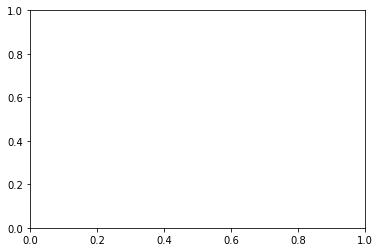

In [212]:
plt.scatter(X_test, Y_test,  color='g', label = "correct values")
plt.plot(X_test, y_new, color='r', linewidth=3, label= "predicted values")
plt.legend(bbox_to_anchor=(0.7, 0.80), loc='center', borderaxespad=0., fontsize = 15)
plt.xticks(())
plt.yticks(())

plt.show()

  <div style="color:blue;  font-size: 30px; text-align:center;  font-weight: bold;">  Feature selection - classification</div> 

  <div style="color:blue;  font-size: 30px; text-align:center;  font-weight: bold;">  Model evaluation </div> 

In [ ]:
ig_selector = SelectKBest(score_func=mutual_info_classif).fit(X,y)

# Get the indices sorted by most important to least important
indices = np.argsort(ig_selector.scores_)[::-1]

ig_features = []
for i in range(len(X.columns)):
    ig_features.append(X.columns[indices[i]])

# Now plot
plt.figure(figsize=(10,10))
plt.yticks(rotation='horizontal',fontsize=16)
plt.barh(ig_features, ig_selector.scores_[indices[range(len(X.columns))]], color='r', align='center')
plt.gca().invert_yaxis()
plt.show()

In [ ]:


val_pca = [10,11,12,13,14,15,16,17,18,19,20]
for pca in val_pca:
    PC = PCA(n_components=pca, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
    PC.fit(dataset.iloc[:,2:32])
    newdt = PC.transform(dataset.iloc[:,2:32])
    X = newdt
    y = dataset.iloc[:,1]
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    #training the model 
    #Ridge regression model 
    model = LinearDiscriminantAnalysis()
    #Cross validation
    scores = cross_val_score(model, X_train, Y_train, cv=5)
   # print(scores)
    interval = "PCA number:"+ str(pca) +" Interval: " + str(min(scores)) + " " + str(max(scores)) 
    print(interval)

In [ ]:
"Sklearn"
"-----------------------"
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(predictions, actuals)
"-----------------------"

print("True Positives: {0}".format(confusion[0][0]))
print("False Positives: {0}".format(confusion[0][1]))
print("False Negatives: {0}".format(confusion[1][0]))
print("True Negatives: {0}".format(confusion[1][1]))

confusion

  <div style="color:blue;  font-size: 30px; text-align:center;  font-weight: bold;">  Cross validation </div> 